In [1]:
import pandas as pd
import numpy as np
from itertools import chain

import ndjson
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gc
gc.collect()

0

In [2]:
f = open('../../Data/pan19-celebrity-profiling-training-dataset-2019-01-31/preprocessed/workset/creator/num/num_concat.ndjson', 'r', encoding='utf-8')


In [90]:
zip(*[[100,250, 500], [2,3,4,5], [1000, 500, 150, 50]])

In [74]:
labels = ndjson.load(open('../../Data/pan19-celebrity-profiling-training-dataset-2019-01-31/labels.ndjson', 'r', encoding ='utf-8'))
labels = pd.DataFrame(labels)

In [3]:
creators = []
es = 0
for line in f:
    if not line:
        continue
    line = f.readline()
    
    try:
        line = json.loads(line)
        creators.append({'ID': line['ID'], 'tweetID':line['tweetID']})
        if es !=0:
            print('line after fail')
    except:
        print(line)
        es+=1
        print(es)
        
f.close()    


1


In [4]:
creators = pd.DataFrame(creators)
creators.to_json('../../Data/pan19-celebrity-profiling-training-dataset-2019-01-31/preprocessed/workset/creator/id_tweet_mapping.json')

In [5]:
creators.head()

ID  tweetID
0  24863  24863_1
1  24863  24863_3
2  24863  24863_5
3  24863  24863_7
4  24863  24863_9

In [71]:
f = open('../../Data/pan19-celebrity-profiling-training-dataset-2019-01-31/preprocessed/workset/creator/polarity/500/polarity_500.ndjson', 'r', encoding='utf-8')
tweet_ids = []

es = 0
for line in f:
    if not line:
        continue
    line = f.readline()
    
    try:
        line = json.loads(line)
        
        tweet_ids.append({'ID': line['ID'], 'tweetIDs':line['tweetIDs']})
        if es !=0:
            print('line after fail')
    except:
        try:
            line = line.split('{')[1]
            line = line.split['}'][0]
            line = '{' + line + '}'
            line = json.loads(line)
            tweet_ids.append(line)
        except:
            print('error')
        
f.close()

error


In [72]:
tweet_ids = pd.DataFrame.from_records(tweet_ids) 

In [75]:
tweet_ids = pd.merge(tweet_ids, labels, how='left', left_on =['ID'], right_on=['id'])


ID                                           tweetIDs occupation  \
906      14544  [14544_6, 14544_7, 14544_8, 14544_9, 14544_10,...    creator   
907      14544  [14544_18, 14544_19, 14544_20, 14544_21, 14544...    creator   
908      14544  [14544_31, 14544_32, 14544_33, 14544_34, 14544...    creator   
909      14544  [14544_45, 14544_46, 14544_47, 14544_48, 14544...    creator   
910      14544  [14544_59, 14544_60, 14544_61, 14544_62, 14544...    creator   
...        ...                                                ...        ...   
1213782  44206  [44206_1038, 44206_1039, 44206_1040, 44206_104...    creator   
1213783  44206  [44206_1048, 44206_1049, 44206_1050, 44206_105...    creator   
1213784  44206   [44206_1059, 44206_1060, 44206_1061, 44206_1062]    creator   
1213785  44206  [44206_1068, 44206_1069, 44206_1070, 44206_107...    creator   
1213786  44206  [44206_1078, 44206_1079, 44206_1080, 44206_108...    creator   

            id  gender       fame  birthyear  
906      14544    male  superstar       1984  
907      14544    male  superstar       1984  
908      14544    male  superstar       1984  
909      14544    male  superstar       1984  
910      14544    male  superstar       1984  
...        ...     ...        ...        ...  
1213782  44206  female     rising       1988  
1213783  44206  female     rising       1988  
1213784  44206  female     rising       1988  
1213785  44206  female     rising       1988  
1213786  44206  female     rising       1988  

[139798 rows x 7 columns]

In [73]:
tweet_ids.head()

ID                                           tweetIDs
0  24863  [24863_7, 24863_8, 24863_9, 24863_10, 24863_11...
1  24863  [24863_21, 24863_22, 24863_23, 24863_24, 24863...
2  24863  [24863_35, 24863_36, 24863_37, 24863_38, 24863...
3  24863  [24863_48, 24863_49, 24863_50, 24863_51, 24863...
4  24863  [24863_59, 24863_60, 24863_61, 24863_62, 24863...

In [9]:
#throw all out of data set below the minimum tweet-count (for creators)
def get_tweet_distrib(path, thresh):

    counter = {}
    f = open(path, 'r', encoding='utf-8')
    for line in f:
        if not line:
            continue
        try:
            line = ndjson.loads(line)[0]
            counter[line['ID']] = counter.get(line['ID'], 0) + 1
        except IOError as e:
            print('line load failed...probably end of file with its many line-breaks')

    vals = np.array(list(chain(counter.values())))
    #get the thresh percent quantile of num tweets  - we want all authors who are above this threshold
    vals = np.quantile(vals, q=thresh, overwrite_input=True)
    return counter, vals


counter, minTweet = get_tweet_distrib('../../Data/pan19-celebrity-profiling-training-dataset-2019-01-31/preprocessed/workset/creator/num/num_concat.ndjson', 0.1)

In [10]:
#the minimum and maximum numbers of tweets are:

print('minimum count for creator is {}'.format(min(counter.values())))
print('maximum count for creator is {}'.format(max(counter.values())))
print('the threshold for the 10% tweet-amount quantile is {}'.format(minTweet))

minimum count for creator is 7
maximum count for creator is 2996
the threshold for the 10% tweet-amount quantile is 897.0


In [26]:
labels.head()
#labels = labels.loc[labels['birthyear'] <=2000,:]

occupation     id  gender  fame  birthyear
0  performer  31448    male  star       1943
1   politics  25082    male  star       1961
2   politics  15880    male  star       1960
3    creator   8821  female  star       1971
4     sports  14515    male  star       1983

In [52]:
labels = labels.loc[((labels['id'].isin([key for key,val in counter.items() if val >=minTweet])) |
                    (labels['occupation'] != 'creator'))&(labels['birthyear']<=2000) &
                    labels['gender'].isin(['male', 'female']),:]


In [53]:
labels.shape

(32449, 5)

In [57]:
def _get_age_class(by):
    """ convert the birthyears of a certain range to the center point.
     This is to reduce the number of classes when doing a classification model over regression on age
     """
    by = int(by)
    if 1940 <= by <= 1955:
        return 1947
    elif 1956 <= by <= 1969:
        return 1963
    elif 1970 <= by <= 1980:
        return 1975
    elif 1981 <= by <= 1989:
        return 1985
    elif 1990 <= by <= 2000: #change to 2000 from 1999 as our data set has a huge spike there
        return 1995  #change center point to 1995
    
    
labels['centered_age'] = labels.apply(lambda x: _get_age_class(x['birthyear']), axis=1)


In [58]:
creat_labs = labels.loc[((labels['id'].isin([key for key,val in counter.items() if val >=minTweet])))&
                        (labels['birthyear']<=2000) &
                    labels['gender'].isin(['male', 'female']),:]


In [59]:
creat_labs.shape

(4211, 6)

In [65]:
import ndjson
import jsonlines
import pandas as pd
from itertools import chain
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.model_selection import  train_test_split
def _equalize(labels, authors, balance, isfirst='both'):
    # we equalize across gender and then across age also (we exlude the nonbinary gender ones as they are so very few
    labels = labels.loc[labels['gender'].isin(['male', 'female']), :]
    # for gender
    ids_gender = None
    ids_age = None
    if isfirst or isfirst == 'both':
        print('sampling for gender')
        strat = labels.apply(lambda x: concat_values(x, balance[0]), axis=1).to_numpy()
        ids_gender = _stratify_data(labels['id'].to_numpy().reshape(-1, 1), strat.reshape(-1, 1),
                                   strategy={'male': authors // 2, 'female': authors // 2},
                                   path=False)
        # make dic for fast check whether id is in set or not

        ids_gender = {key: labels.loc[labels['id'] == key, ['gender', 'centered_age','birthyear']].to_dict('records')[0] for key in
                      ids_gender}
    
    if not isfirst or isfirst == 'both':
        # stratify across age and gender
        strat = labels.apply(lambda x: concat_values(x, balance[1]), axis=1).to_numpy()

        un = np.unique(strat)
        strategy = {str(key): (authors // len(un)) for key in un}
        print('sampling for age')
        print(strategy)
        print(un)
        ids_age = _stratify_data(labels['id'].to_numpy().reshape(-1, 1), strat.reshape(-1, 1), strategy=strategy, path=False)
        # make dic for fast check whether id is in set or not
        ids_age = {key: labels.loc[labels['id'] == key, ['gender', 'centered_age','birthyear']].to_dict('records')[0] for key in
                   ids_age}


    return ids_gender, ids_age


def _stratify_data(ids, strats, strategy='not majority', path = False):
#stratifies in an undersampling strategy according to the stras passeed
    if path:
        with open(path, 'r', encoding='utf-8') as f:
            data = ndjson.load(f)
            data = pd.DataFrame(data)
            ids = data[ids].to_numpy().reshape(-1, 1)
            if type(strats) == type(list()):
                strats = np.array(data.apply(lambda x: concat_values(x, strats), axis=1)).reshape(-1, 1)
            else:
                strats = data[strats].to_numpy().reshape(-1, 1)
    else:
        ids = np.array(ids).reshape(-1, 1)
        strats = np.array(strats).reshape(-1, 1)
    print('have initial distirbution {}'.format(Counter(strats.flatten().tolist())))
    rus = RandomUnderSampler(sampling_strategy=strategy, random_state=int(1234567))
    ids, strats = rus.fit_resample(ids, strats)
    print('have new dsitrbution {}'.format(Counter(strats.flatten().tolist())))
    return ids.flatten().tolist()


def concat_values(x, cols):
    st = ''
    for col in cols:
        st +='_{}'.format(x[col])
    return st[1:]


In [62]:
Counter([True if el in creat_labs.id.to_list() else False for el in counter.keys()])

Counter({True: 4211, False: 468})

In [61]:
Counter(creat_labs.apply(lambda x: concat_values(x, ['centered_age']), axis=1))

Counter({'1975': 1442, '1985': 764, '1995': 236, '1963': 1231, '1947': 538})

In [63]:
#ids_gender, ids_age = _equalize(creat_labs, 1000, balance=[['gender'], ['centered_age', 'gender']])


In [358]:
len(np.unique(list(ids_gender.keys())))

1000

In [64]:
ids_gender2, ids_age2 = _equalize(creat_labs, 500,
                                  balance=[['gender'], ['centered_age', 'gender']])

sampling for gender
sampling for age
{'1947_female': 50, '1947_male': 50, '1963_female': 50, '1963_male': 50, '1975_female': 50, '1975_male': 50, '1985_female': 50, '1985_male': 50, '1995_female': 50, '1995_male': 50}
['1947_female' '1947_male' '1963_female' '1963_male' '1975_female'
 '1975_male' '1985_female' '1985_male' '1995_female' '1995_male']


In [92]:
np.unique(creat_labs['centered_age'])

array([1947, 1963, 1975, 1985, 1995], dtype=int64)

In [66]:
len(np.unique(list(ids_gender2.keys())))

500

In [80]:
tweet_ids['uID'] = tweet_ids.apply(lambda x: '|'.join(x['tweetIDs']), axis=1)

In [81]:
Counter(creat_labs.loc[creat_labs.id.isin(ids_gender2), 'gender'])

Counter({'male': 250, 'female': 250})

In [82]:
tweet_ids.loc[tweet_ids['ID'].isin(list(ids_gender2.keys()))]

ID                                           tweetIDs occupation  \
906      14544  [14544_6, 14544_7, 14544_8, 14544_9, 14544_10,...    creator   
907      14544  [14544_18, 14544_19, 14544_20, 14544_21, 14544...    creator   
908      14544  [14544_31, 14544_32, 14544_33, 14544_34, 14544...    creator   
909      14544  [14544_45, 14544_46, 14544_47, 14544_48, 14544...    creator   
910      14544  [14544_59, 14544_60, 14544_61, 14544_62, 14544...    creator   
...        ...                                                ...        ...   
1213782  44206  [44206_1038, 44206_1039, 44206_1040, 44206_104...    creator   
1213783  44206  [44206_1048, 44206_1049, 44206_1050, 44206_105...    creator   
1213784  44206   [44206_1059, 44206_1060, 44206_1061, 44206_1062]    creator   
1213785  44206  [44206_1068, 44206_1069, 44206_1070, 44206_107...    creator   
1213786  44206  [44206_1078, 44206_1079, 44206_1080, 44206_108...    creator   

            id  gender       fame  birthyear  \
906      14544    male  superstar       1984   
907      14544    male  superstar       1984   
908      14544    male  superstar       1984   
909      14544    male  superstar       1984   
910      14544    male  superstar       1984   
...        ...     ...        ...        ...   
1213782  44206  female     rising       1988   
1213783  44206  female     rising       1988   
1213784  44206  female     rising       1988   
1213785  44206  female     rising       1988   
1213786  44206  female     rising       1988   

                                                       uID  
906      14544_6|14544_7|14544_8|14544_9|14544_10|14544...  
907      14544_18|14544_19|14544_20|14544_21|14544_22|1...  
908      14544_31|14544_32|14544_33|14544_34|14544_35|1...  
909      14544_45|14544_46|14544_47|14544_48|14544_49|1...  
910      14544_59|14544_60|14544_61|14544_62|14544_63|1...  
...                                                    ...  
1213782  44206_1038|44206_1039|44206_1040|44206_1041|44...  
1213783  44206_1048|44206_1049|44206_1050|44206_1051|44...  
1213784        44206_1059|44206_1060|44206_1061|44206_1062  
1213785  44206_1068|44206_1069|44206_1070|44206_1071|44...  
1213786  44206_1078|44206_1079|44206_1080|44206_1081|44...  

[139798 rows x 8 columns]

In [77]:
Counter(tweet_ids['gender'])

Counter({'male': 803329, 'female': 410831})

In [78]:
Counter(tweet_ids.loc[tweet_ids['ID'].isin(list(ids_gender2.keys())), 'gender'])

Counter({'male': 71760, 'female': 68038})

In [89]:
##restratify across gender
new_ids = _stratify_data(tweet_ids.loc[tweet_ids['ID'].isin(list(ids_gender2.keys())), 'uID'].to_numpy().reshape((-1,1)),
               tweet_ids.loc[tweet_ids['ID'].isin(list(ids_gender2.keys())), 'gender'].to_numpy().reshape((-1,1)),
                strategy='not minority',path = False)


have initial distirbution Counter({'male': 71760, 'female': 68038})
have new dsitrbution Counter({'female': 68038, 'male': 68038})


In [419]:
rus = RandomUnderSampler(random_state=int(1234567))
strat_id_man, strats = rus.fit_resample(ids, strat)

In [420]:
print(strat_id_man.shape)

(127806, 1)


In [ ]:
Counter(tweet_ids.loc[tweet_ids['tweetIDs'].isin(np.unique(strat_id_man.flatten())), 'gender'])

In [395]:
ids.shape

(130397, 1)

In [393]:
strat_id = _stratify_data(ids, strat, strategy='not majority', path = False)

In [394]:
len(strat_id)

130397

In [377]:
Counter(tweet_ids.loc[tweet_ids['ID'].isin(strat_id), 'gender'])

Counter({'female': 63903, 'male': 66494})

In [238]:
id_list = [key for key,val in counter.items() if val >=minTweet]
too_low = [key for key,val in counter.items() if val <minTweet]
label_ids = labels.loc[labels['occupation'] == 'creator', 'id'].to_list()

res = set(id_list) - set(label_ids)
print(res)

{44010}


In [243]:
Counter([val >= minTweet for key, val in counter.items()])

Counter({True: 4212, False: 467})

In [298]:
creators.loc[[el == False for el in creators['ID'].isin(set(labels['id']))], 'ID']

Series([], Name: ID, dtype: int64)

In [197]:
pd.merge(creators, labels, how='left', left_on=['ID'], right_on=['id'])

ID     tweetID occupation       id  gender       fame  birthyear  \
0        24863     24863_1    creator  24863.0    male  superstar     1985.0   
1        24863     24863_3    creator  24863.0    male  superstar     1985.0   
2        24863     24863_5    creator  24863.0    male  superstar     1985.0   
3        24863     24863_7    creator  24863.0    male  superstar     1985.0   
4        24863     24863_9    creator  24863.0    male  superstar     1985.0   
...        ...         ...        ...      ...     ...        ...        ...   
4028259  12361  12361_2220    creator  12361.0  female     rising     1940.0   
4028260  12361  12361_2222    creator  12361.0  female     rising     1940.0   
4028261  12361  12361_2224    creator  12361.0  female     rising     1940.0   
4028262  12361  12361_2226    creator  12361.0  female     rising     1940.0   
4028263  12361  12361_2228    creator  12361.0  female     rising     1940.0   

         centered_age  
0              1985.0  
1              1985.0  
2              1985.0  
3              1985.0  
4              1985.0  
...               ...  
4028259        1947.0  
4028260        1947.0  
4028261        1947.0  
4028262        1947.0  
4028263        1947.0  

[4028264 rows x 8 columns]

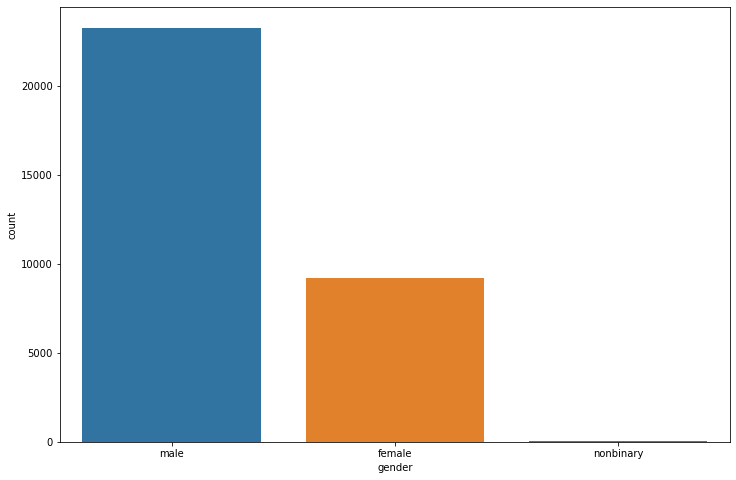

In [223]:
fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='gender', data=labels)
plt.show()

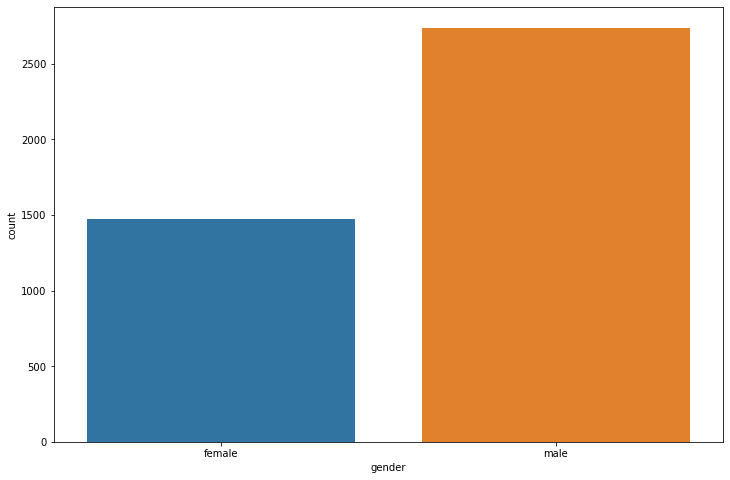

        occupation    id  fame  birthyear  centered_age
gender                                                 
female        1471  1471  1471       1471          1471
male          2740  2740  2740       2740          2740


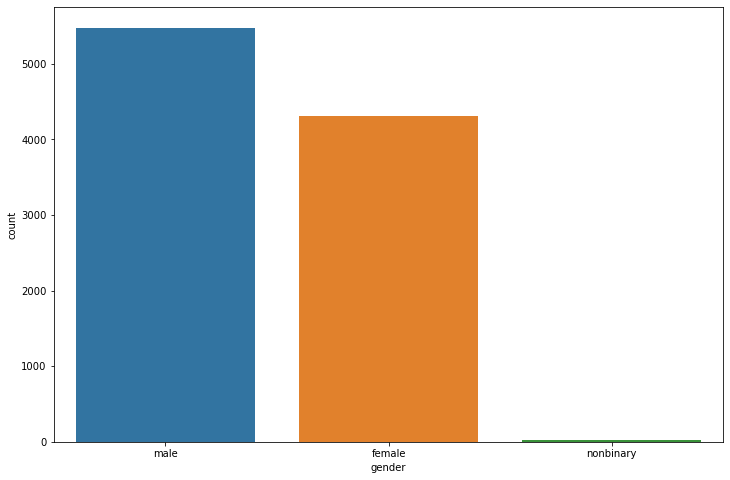

           occupation    id  fame  birthyear  centered_age
gender                                                    
female           4314  4314  4314       4314          4314
male             5476  5476  5476       5476          5476
nonbinary          20    20    20         20            20


In [224]:
fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='gender', data=labels.loc[labels['occupation']=='creator', :])
plt.show()
fig, ax = plt.subplots(1, figsize=(12,8))
print(labels.loc[labels['occupation']=='creator', :].groupby('gender').count())

ax = sns.countplot(x='gender', data=labels.loc[labels['occupation']=='performer', :])
plt.show()
print(labels.loc[labels['occupation']=='performer', :].groupby('gender').count())

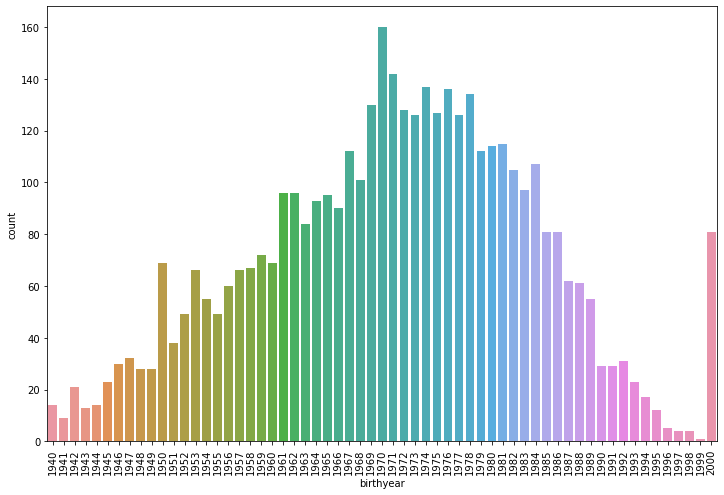

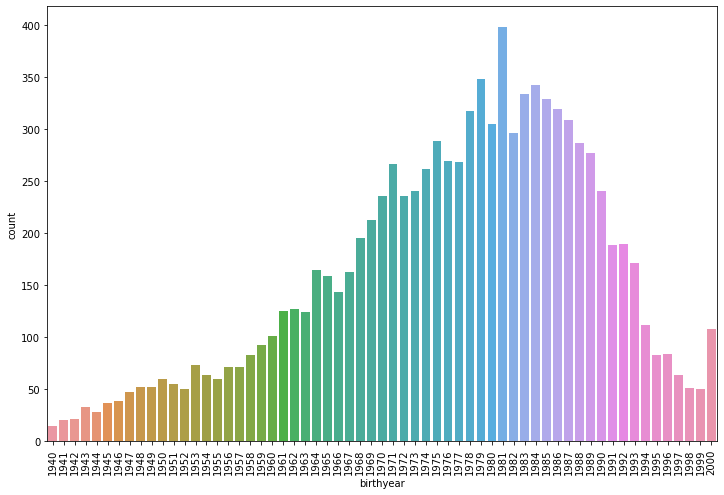

In [225]:
fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='birthyear', data=labels.loc[labels['occupation']=='creator', :])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='birthyear', data=labels.loc[labels['occupation']=='performer', :])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

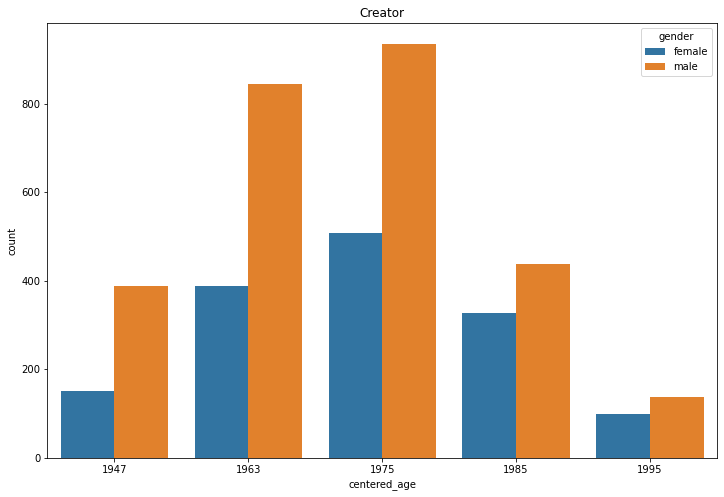

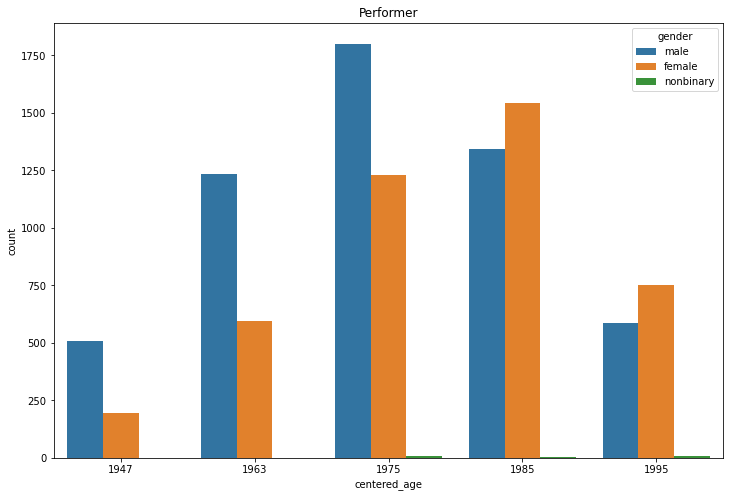

occupation    gender   
creator       female        1471
              male          2740
manager       female         123
              male           643
              nonbinary        2
performer     female        4314
              male          5476
              nonbinary       20
politics      female         834
              male          1999
              nonbinary        1
professional  female         139
              male           384
              nonbinary        1
religious     female           5
              male            30
science       female         202
              male           616
sports        female        2093
              male         11380
              nonbinary        1
dtype: int64


In [226]:
#birthyear with the evening employed by PAN people

fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='centered_age', hue='gender', data=labels.loc[labels['occupation']=='creator', :])
ax.set_title('Creator')
plt.show()
fig, ax = plt.subplots(1, figsize=(12,8))

ax = sns.countplot(x='centered_age', hue='gender',data=labels.loc[labels['occupation']=='performer', :])
ax.set_title('Performer')

plt.show()
print(labels.groupby(['occupation', 'gender']).apply(lambda x: len(x['centered_age'])))